In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
data1 = pd.read_csv('EV_India.csv')
data2 = pd.read_csv('css.csv')

In [85]:
data1.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman and Nicobar Island,162.0,146945.0,147107.0
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20.0,252965.0,252985.0
3,4,Assam,64766.0,4677053.0,4741819.0
4,5,Bihar,83335.0,10407078.0,10490413.0


In [86]:
data2.head()

,State,No. of EV chargers sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [87]:
# left join

mega_data = pd.merge(left = data1, right = data2, 
                   left_on = ['State Name'],
                   right_on = ['State'],
                   how = "left")

In [88]:
mega_data.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,State,No. of EV chargers sanctioned
0,1,Andaman and Nicobar Island,162.0,146945.0,147107.0,Andaman and Nicobar Island,10.0
1,2,Andra Pradesh,NaN,NaN,NaN,NaN,NaN
2,3,Arunachal Pradesh,20.0,252965.0,252985.0,NaN,NaN
3,4,Assam,64766.0,4677053.0,4741819.0,Assam,20.0
4,5,Bihar,83335.0,10407078.0,10490413.0,Bihar,37.0


In [89]:
mega_data.shape

(36, 7)

In [90]:
data1.shape

(36, 5)

In [91]:
mega_data.drop(['State'], axis = 1, inplace = True)

In [92]:
mega_data.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned
0,1,Andaman and Nicobar Island,162.0,146945.0,147107.0,10.0
1,2,Andra Pradesh,NaN,NaN,NaN,NaN
2,3,Arunachal Pradesh,20.0,252965.0,252985.0,NaN
3,4,Assam,64766.0,4677053.0,4741819.0,20.0
4,5,Bihar,83335.0,10407078.0,10490413.0,37.0


In [93]:
mega_data.drop(['Sr. No.'], axis = 1, inplace = True)

In [95]:
mega_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Name                     36 non-null     object 
 1   Total Electric Vehicle         32 non-null     float64
 2   Total Non-Electric Vehicle     32 non-null     float64
 3   Total                          32 non-null     float64
 4   No. of EV chargers sanctioned  24 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


In [96]:
mega_data.dropna(axis = 0, inplace = True)

In [97]:
mega_data.shape

(22, 5)

In [120]:
mega_data['State Name']

0     Andaman and Nicobar Island
3                          Assam
4                          Bihar
5                     Chandigarh
6                   Chhattisgarh
7                          Delhi
9                        Gujarat
10                       Haryana
11              Himachal Pradesh
12             Jammu and Kashmir
14                     Karnataka
15                        Kerala
19                   Maharashtra
21                     Meghalaya
24                        Odisha
25                    Puducherry
27                     Rajasthan
28                        Sikkim
29                    Tamil Nadu
33                   Uttarakhand
34                 Uttar Pradesh
35                   West Bengal
Name: State Name, dtype: object

In [99]:
mega_data['Total Electric Vehicle'].replace(",", "", inplace = True)

In [100]:
mega_data['Total Electric Vehicle']

0        162.0
3      64766.0
4      83335.0
5       2812.0
6      20966.0
7     156393.0
9      45272.0
10     37035.0
11      1175.0
12      2941.0
14    120532.0
15     30775.0
19    116646.0
21        49.0
24     23371.0
25      2149.0
27     81338.0
28        21.0
29     82051.0
33     31008.0
34    337180.0
35     48767.0
Name: Total Electric Vehicle, dtype: float64

In [101]:
mega_data['Total Electric Vehicle'] = mega_data['Total Electric Vehicle'].astype('int')
mega_data['Total Non-Electric Vehicle'] = mega_data['Total Non-Electric Vehicle'].astype('int')
mega_data['Total'] = mega_data['Total'].astype('int')

In [102]:
mega_data['No. of EV chargers sanctioned'] = mega_data['No. of EV chargers sanctioned'].astype('int')

In [103]:
mega_data.head()

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned
0,Andaman and Nicobar Island,162,146945,147107,10
3,Assam,64766,4677053,4741819,20
4,Bihar,83335,10407078,10490413,37
5,Chandigarh,2812,746881,749693,70
6,Chhattisgarh,20966,6836200,6857166,25


In [122]:
mega_data.drop(['Total Non-Electric Vehicle'], axis = 1, inplace = True)
mega_data.drop(['Total'], axis = 1, inplace = True)
# mega_data['EV Ratio'] = mega_data['Total Electric Vehicle']/mega_data['Total']

In [123]:
mega_data.head()

,State Name,Total Electric Vehicle,No. of EV chargers sanctioned,EV Ratio,EV CS Ratio
0,Andaman and Nicobar Island,162,10,0.001101,0.003476
3,Assam,64766,20,0.013658,0.006952
4,Bihar,83335,37,0.007944,0.012861
5,Chandigarh,2812,70,0.003751,0.024331
6,Chhattisgarh,20966,25,0.003058,0.008690


In [107]:
# mega_data.to_csv('ms_ev.csv', index = False)

In [115]:
# mega_data['EV CS Ratio'] = mega_data['No. of EV chargers sanctioned']/2877

In [124]:
X = mega_data.iloc[:, -4:-2].values

In [125]:
X.shape

(22, 2)

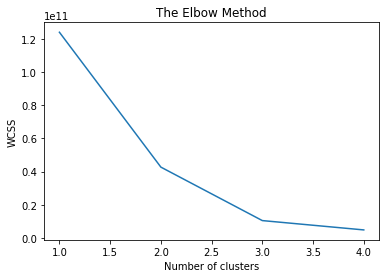

In [126]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [141]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)
y_kmeans = kmeans.fit_predict(X)

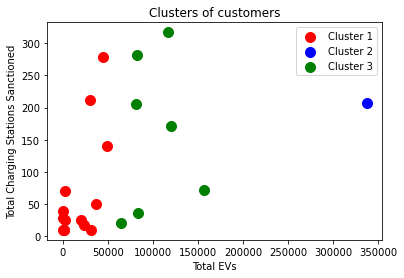

In [142]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total EVs')
plt.ylabel('Total Charging Stations Sanctioned')
plt.legend()
plt.show()